In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import the requests library.
import requests

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy
from config import weather_api_key

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=77cd1e09a0861d0462d51e6f0a79a9a1


In [6]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

608

In [8]:
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

colwyn bay gb
chuy uy
kapaa us
ushuaia ar
mataura pf
albany au
mahibadhoo mv
talnakh ru
mataura pf
upernavik gl
cachira co
hofn is
guymon us
north bend us
puerto ayora ec
kavaratti in
rikitea pf
mys shmidta ru
sassandra ci
mahebourg mu
abu samrah qa
saskylakh ru
kamenka ru
carnarvon au
dingle ie
iwanai jp
santiago del estero ar
saint-philippe re
hobart au
albany au
sinjah sd
vaini to
kudahuvadhoo mv
cheuskiny ru
padang id
rikitea pf
necochea ar
qaanaaq gl
saint-philippe re
sao gabriel da cachoeira br
ribeira grande pt
vaitupu wf
puerto ayora ec
busselton au
yuzhno-yeniseyskiy ru
thompson ca
ushuaia ar
alta floresta br
illoqqortoormiut gl
bakchar ru
zapadnaya dvina ru
longyearbyen sj
kahului us
gold coast au
ushuaia ar
severo-kurilsk ru
torbay ca
albany au
havoysund no
busselton au
nan th
yellowknife ca
tiksi ru
mar del plata ar
butzbach de
illoqqortoormiut gl
valparaiso br
victoria sc
illoqqortoormiut gl
provideniya ru
cairns au
honningsvag no
castro cl
puerto ayora ec
barrow us
bury s

hilo us
atuona pf
bethel us
charcas mx
yellowknife ca
akyab mm
cidreira br
saint-pierre pm
mount isa au
barrow us
halifax ca
sitka us
cape town za
road town vg
vila franca do campo pt
sur om
illoqqortoormiut gl
namatanai pg
srandakan id
huercal-overa es
chuy uy
avarua ck
maloshuyka ru
college us
new norfolk au
torbay ca
bredasdorp za
kazachinskoye ru
hambantota lk
cape town za
punta arenas cl
bredasdorp za
casper us
mataura pf
kapaa us
hilo us
ushuaia ar
clyde river ca
nyurba ru
srednekolymsk ru
butaritari ki
vvedenskoye ru
sorland no
illoqqortoormiut gl
sakakah sa
saleaula ws
ushuaia ar
hermanus za
ribeira grande pt
albany au
sibolga id
kollam in
san patricio mx
pacific grove us
vanimo pg
norman wells ca
jamestown sh
saskylakh ru
meulaboh id
esperance au
zaysan kz
cockburn town bs
marcona pe
cape town za
dikson ru
busselton au
albany au
rikitea pf
hambantota lk
campbell river ca
guerrero negro mx
svetlogorsk ru
cockburn town tc
jieshi cn
zalantun cn
sola vu
havre-saint-pierre ca
maraw

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [19]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    
    # Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
     # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
     # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
  

Processing Record 1 of Set 37 | colwyn bay
Processing Record 2 of Set 37 | chuy
Processing Record 3 of Set 37 | kapaa
Processing Record 4 of Set 37 | ushuaia
Processing Record 5 of Set 37 | mataura
Processing Record 6 of Set 37 | albany
Processing Record 7 of Set 37 | mahibadhoo
Processing Record 8 of Set 37 | talnakh
Processing Record 9 of Set 37 | upernavik
Processing Record 10 of Set 37 | cachira
Processing Record 11 of Set 37 | hofn
Processing Record 12 of Set 37 | guymon
Processing Record 13 of Set 37 | north bend
Processing Record 14 of Set 37 | puerto ayora
Processing Record 15 of Set 37 | kavaratti
Processing Record 16 of Set 37 | rikitea
Processing Record 17 of Set 37 | mys shmidta
City not found. Skipping...
Processing Record 18 of Set 37 | sassandra
Processing Record 19 of Set 37 | mahebourg
Processing Record 20 of Set 37 | abu samrah
Processing Record 21 of Set 37 | saskylakh
Processing Record 22 of Set 37 | kamenka
Processing Record 23 of Set 37 | carnarvon
Processing Reco

Processing Record 32 of Set 40 | brigantine
Processing Record 33 of Set 40 | riyadh
Processing Record 34 of Set 40 | bac lieu
Processing Record 35 of Set 40 | vera cruz
Processing Record 36 of Set 40 | constitucion
Processing Record 37 of Set 40 | port hedland
Processing Record 38 of Set 40 | avarua
Processing Record 39 of Set 40 | lodja
Processing Record 40 of Set 40 | vakhtan
Processing Record 41 of Set 40 | rabat
Processing Record 42 of Set 40 | makakilo city
Processing Record 43 of Set 40 | sulangan
Processing Record 44 of Set 40 | jumla
Processing Record 45 of Set 40 | port-cartier
Processing Record 46 of Set 40 | broken hill
Processing Record 47 of Set 40 | nemuro
Processing Record 48 of Set 40 | klaksvik
Processing Record 49 of Set 40 | cabedelo
Processing Record 50 of Set 40 | dali
Processing Record 1 of Set 41 | svetlogorsk
Processing Record 2 of Set 41 | saint george
Processing Record 3 of Set 41 | east london
Processing Record 4 of Set 41 | codrington
Processing Record 5 of 

City not found. Skipping...
Processing Record 20 of Set 44 | college
Processing Record 21 of Set 44 | kazachinskoye
Processing Record 22 of Set 44 | hambantota
Processing Record 23 of Set 44 | casper
Processing Record 24 of Set 44 | vvedenskoye
Processing Record 25 of Set 44 | sorland
Processing Record 26 of Set 44 | sakakah
Processing Record 27 of Set 44 | saleaula
City not found. Skipping...
Processing Record 28 of Set 44 | sibolga
Processing Record 29 of Set 44 | kollam
Processing Record 30 of Set 44 | pacific grove
Processing Record 31 of Set 44 | meulaboh
Processing Record 32 of Set 44 | zaysan
Processing Record 33 of Set 44 | cockburn town
Processing Record 34 of Set 44 | marcona
City not found. Skipping...
Processing Record 35 of Set 44 | campbell river
Processing Record 36 of Set 44 | jieshi
Processing Record 37 of Set 44 | zalantun
Processing Record 38 of Set 44 | sola
Processing Record 39 of Set 44 | marawi
Processing Record 40 of Set 44 | sampang
Processing Record 41 of Set 

Processing Record 6 of Set 48 | kudat
Processing Record 7 of Set 48 | fare
Processing Record 8 of Set 48 | kalanguy
Processing Record 9 of Set 48 | sataua
City not found. Skipping...
Processing Record 10 of Set 48 | sann
Processing Record 11 of Set 48 | qeshm
Processing Record 12 of Set 48 | upata
Processing Record 13 of Set 48 | tocopilla
Processing Record 14 of Set 48 | san quintin
Processing Record 15 of Set 48 | kifri
Processing Record 16 of Set 48 | haines junction
Processing Record 17 of Set 48 | pachino
Processing Record 18 of Set 48 | durban
Processing Record 19 of Set 48 | todos santos
Processing Record 20 of Set 48 | coquimbo
Processing Record 21 of Set 48 | general roca
Processing Record 22 of Set 48 | comodoro rivadavia
Processing Record 23 of Set 48 | henties bay
Processing Record 24 of Set 48 | puerto maldonado
Processing Record 25 of Set 48 | samarai
Processing Record 26 of Set 48 | bonavista
Processing Record 27 of Set 48 | honggang
Processing Record 28 of Set 48 | vao


In [20]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Colwyn Bay,53.2948,-3.7267,60.94,16,99,11.01,GB,2022-05-22 19:00:36
1,Chuy,-33.6971,-53.4616,63.21,57,39,4.88,UY,2022-05-22 19:00:36
2,Kapaa,22.0752,-159.3190,78.12,84,100,11.50,US,2022-05-22 19:00:36
3,Ushuaia,-54.8000,-68.3000,40.62,81,20,2.30,AR,2022-05-22 18:57:29
4,Mataura,-46.1927,168.8643,44.33,91,100,7.65,NZ,2022-05-22 19:00:37
...,...,...,...,...,...,...,...,...,...
556,Basco,20.4487,121.9702,81.72,79,100,11.92,PH,2022-05-22 19:05:26
557,Takoradi,4.8845,-1.7554,75.94,88,100,4.43,GH,2022-05-22 19:05:26
558,Vostok,46.4856,135.8833,40.19,95,88,2.86,RU,2022-05-22 19:05:27
559,Aldergrove,49.0580,-122.4709,68.22,55,92,1.99,CA,2022-05-22 19:05:27


In [21]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

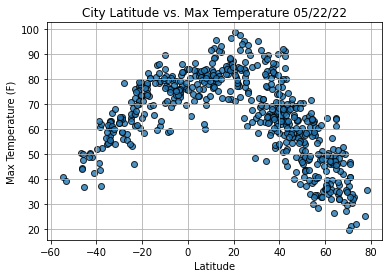

In [25]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Fig1.png")

# Show plot.
plt.show()

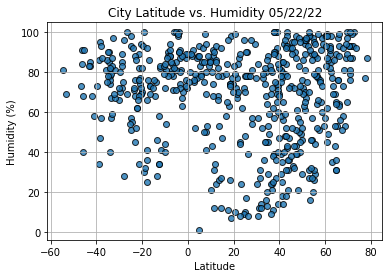

In [26]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Fig2.png")
# Show plot.
plt.show()

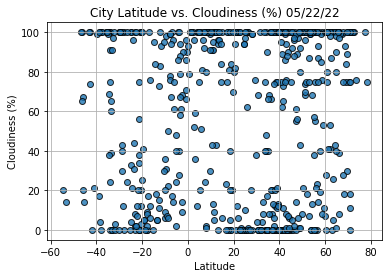

In [27]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Fig3.png")
# Show plot.
plt.show()

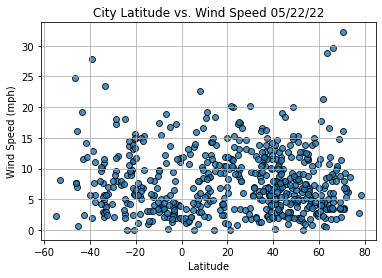

In [28]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Fig4.png")
# Show plot.
plt.show()